<a href="https://colab.research.google.com/github/Myllena-Oliveira/Data_Science/blob/main/AtividadeAvaliativa_analise_do_numero_de_domicilios_extremamente_pobres_no_brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O DataSet escolhido para ser trabalhando nesta atividade foi o "Pobreza - número de domicílios extremamente pobres" do Instituto de Pesquisa Econômica Aplicada (IPEA) disponível em http://www.ipeadata.gov.br/Default.aspx.

Neste trabalho iremos analisar o número de domicílios com renda domiciliar per capita inferior à linha de extrema pobreza (ou indigência, ou miséria) no Brasil.

A linha de extrema pobreza considerada pelo IPEA é uma estimativa do valor de uma cesta de alimentos com o mínimo de calorias necessárias para suprir adequadamente uma pessoa, com base em recomendações da FAO e da OMS. São estimados diferentes valores para 24 regiões do país. 

Este DataSet tem uma frequência anual de 2001 até 2014.

#Conhecendo o DataFrame

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel ('/content/ipeadata[10-04-2023-03-22].xls')

In [ ]:
df.head()

,Sigla,Codigo,Estado,Região,2001,2002,2003,2004,2005,2006,2007,2008,2009,2011,2012,2013,2014
0,AC,12,Acre,Norte,14551,14167,18554,26241,25562,18956,27503,18394,18653,18070,15479,17071,14448
1,AL,27,Alagoas,Nordeste,206057,207925,220577,199123,174570,152518,148302,150761,149203,113137,89195,109561,95135
2,AM,13,Amazonas,Norte,86075,83591,86470,103760,63608,70320,103376,78978,65839,83183,65394,77799,52988
3,AP,16,Amapá,Norte,8835,13334,20739,19195,10509,9995,14826,7796,10299,15161,11777,13306,4387
4,BA,29,Bahia,Nordeste,817561,767709,841204,691123,616112,538671,537517,496320,477206,465287,457086,430610,309792


In [ ]:
df.shape

(27, 17)

In [ ]:
df.isna().sum().sum()

0

#Análise exploratória

In [ ]:
print(df.head())

  Sigla  Codigo    Estado    Região    2001    2002    2003    2004    2005  \
0    AC      12      Acre     Norte   14551   14167   18554   26241   25562   
1    AL      27   Alagoas  Nordeste  206057  207925  220577  199123  174570   
2    AM      13  Amazonas     Norte   86075   83591   86470  103760   63608   
3    AP      16     Amapá     Norte    8835   13334   20739   19195   10509   
4    BA      29     Bahia  Nordeste  817561  767709  841204  691123  616112   

     2006    2007    2008    2009    2011    2012    2013    2014  
0   18956   27503   18394   18653   18070   15479   17071   14448  
1  152518  148302  150761  149203  113137   89195  109561   95135  
2   70320  103376   78978   65839   83183   65394   77799   52988  
3    9995   14826    7796   10299   15161   11777   13306    4387  
4  538671  537517  496320  477206  465287  457086  430610  309792  


###Utilizando método describe() verifica-se algumas das principais estatísticas relacionadas ao dados utilizados.

In [ ]:
print(df.describe())

          Codigo           2001           2002           2003           2004  \
count  27.000000      27.000000      27.000000      27.000000      27.000000   
mean   29.111111  195463.185185  180641.370370  204957.148148  182865.703704   
std    13.024631  199680.507441  186775.317249  212943.058320  182768.492907   
min    11.000000    8835.000000   11704.000000    8950.000000   19195.000000   
25%    19.000000   51288.000000   41453.500000   51478.000000   42489.000000   
50%    27.000000  148128.000000  140671.000000  151549.000000  142336.000000   
75%    38.000000  238522.000000  207277.500000  245385.500000  227320.500000   
max    53.000000  817561.000000  767709.000000  841204.000000  691123.000000   

                2005           2006           2007           2008  \
count      27.000000      27.000000      27.000000      27.000000   
mean   162338.407407  138539.185185  140760.962963  123508.518519   
std    159707.523732  139317.621174  137078.655230  121640.400568   
min

#Gráficos

##Gráfico por estado do Brasil

In [ ]:
regioes = {
    'Norte': ['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

In [ ]:
df['Região'] = df['Sigla'].map({estado: regiao for regiao, estados in regioes.items() for estado in estados})


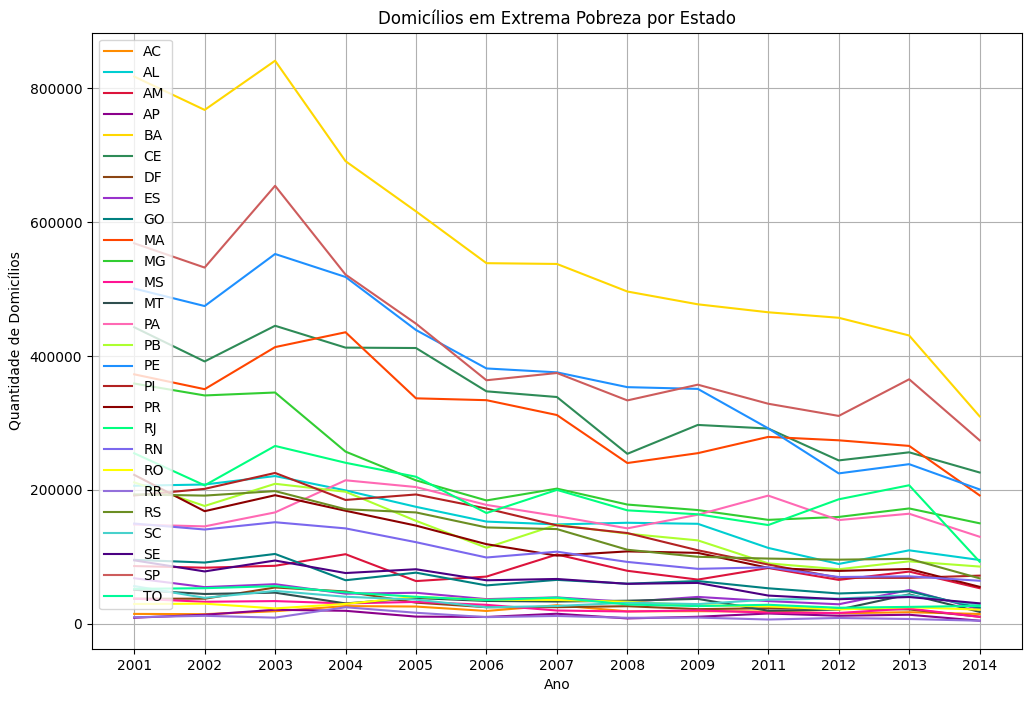

In [ ]:
cores = ['#FF8C00', '#00CED1', '#DC143C', '#8B008B', '#FFD700', '#2E8B57', '#8B4513', '#9932CC',
         '#008080', '#FF4500', '#32CD32', '#FF1493', '#2F4F4F', '#FF69B4', '#ADFF2F', '#1E90FF',
         '#B22222', '#8B0000', '#00FF7F', '#7B68EE', '#FFFF00', '#9370DB', '#6B8E23', '#48D1CC',
         '#4B0082', '#CD5C5C', '#00FA9A']

for i, estado in enumerate(df['Sigla']):
    df_estado = df[df['Sigla'] == estado]

    anos = df_estado.columns[4:]  
    dados = df_estado.iloc[:, 4:].values.flatten()

    plt.plot(anos, dados, label=estado, color=cores[i])


plt.rcParams["figure.figsize"] = (12,8)
plt.title('Domicílios em Extrema Pobreza por Estado')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Domicílios')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

####A partir deste gráfico, conseguimos visualizar que o estado com o maior número de domicílios em extrema pobreza no intervalo de tempo analisado é a Bahia.

##Gráfico por região do Brasil

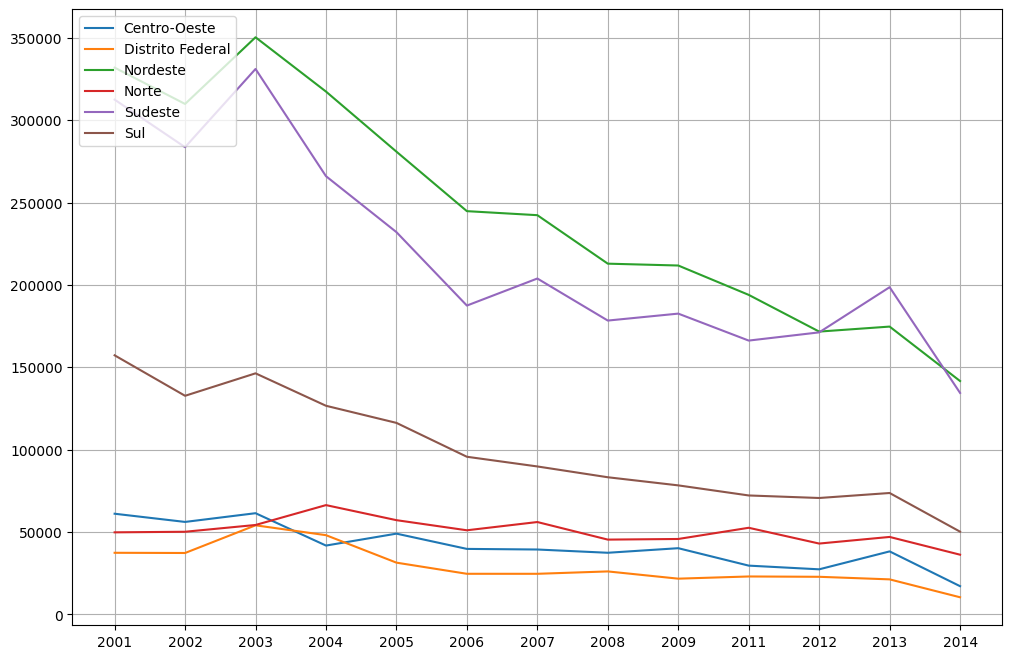

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

for regiao, dados in df.groupby('Região'):
    media_regiao = dados[anos].mean()
    ax.plot(anos, media_regiao, label=regiao)
plt.legend(loc='upper left')
plt.grid(True)

####A regiões que se destacam com o maior número de domicílios em extrema pobreza é o Nordeste e o Sudeste.



##Pico máximo de domicílios em extrema pobreza no Brasil

In [ ]:
df = df.set_index('Estado') #obs: cada vez que for rodar esta linha, é necessário rodar a base de dados e o código do primeiro gráfico antes, para que não dê erro

In [ ]:
max_pobreza = df.iloc[:, 3:].apply(pd.to_numeric).max()

In [ ]:
dados_pico = max_pobreza.idxmax()


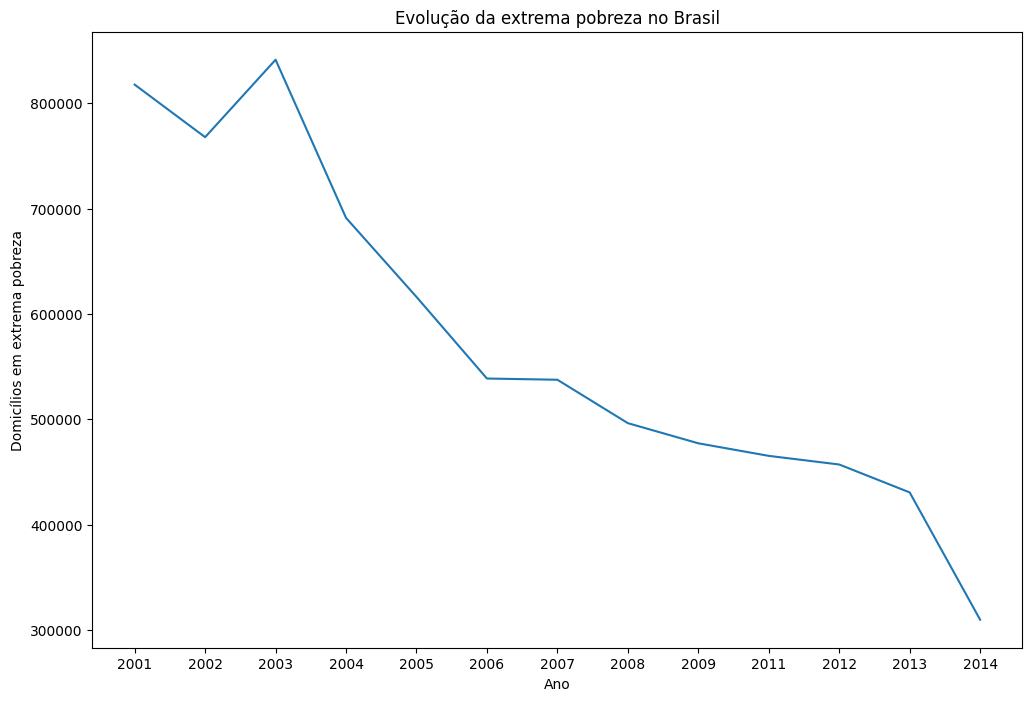

In [ ]:
plt.plot(df.columns[3:], max_pobreza)
plt.xlabel('Ano')
plt.ylabel('Domicílios em extrema pobreza')
plt.title('Evolução da extrema pobreza no Brasil')
plt.show()

####O pico máximo de residências extremamente pobres no Brasil se deu em 2003, com exatos 841.204 domicílios no estado da Bahia.

##Pico mínimo de domicílios em extrema pobreza no Brasil

In [ ]:
df = df.set_index('Estado') #obs: cada vez que for rodar esta linha, é necessário rodar a base de dados e o código do primeiro gráfico antes, para que não dê erro

In [ ]:
min_pobreza = df.iloc[:, 3:].apply(pd.to_numeric).min()

In [ ]:
dados_pico = min_pobreza.idxmin()

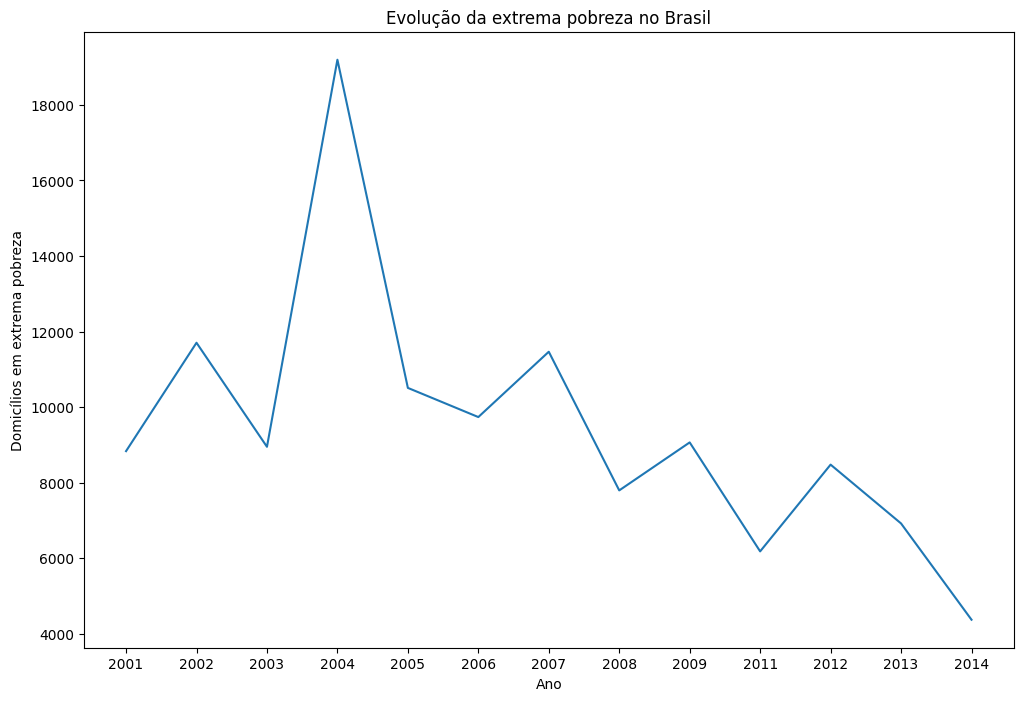

In [ ]:
plt.plot(df.columns[3:], min_pobreza)
plt.xlabel('Ano')
plt.ylabel('Domicílios em extrema pobreza')
plt.title('Evolução da extrema pobreza no Brasil')
plt.show()

####O estado que atingiu o pico mínimo, com 4.373 domicílios foi Roraima, em 2014.

## Regiões brasileiras que sempre estiveram acima da média em quantidade de domicílios em extrema pobreza



In [ ]:
mean_anos = df.mean()[4:]

In [82]:
mean_regioes = pd.DataFrame(columns=mean_anos.index)

for regiao, estado in regioes.items(): #obs: cada vez que for rodar esta linha, é necessário rodar a base de dados e o código do primeiro gráfico antes, para que não dê erro
    regiao_df = df.loc[df['Sigla'].isin(estado)]
    regiao_mean = regiao_df.mean()[4:]
    mean_regioes.loc[regiao] = regiao_mean
print (regiao_mean)

2004    126615.000000
2005    116228.000000
2006     95660.666667
2007     89780.666667
2008     83224.333333
2009     78292.333333
2011     72171.666667
2012     70633.666667
2013     73665.333333
2014     50191.000000
dtype: float64


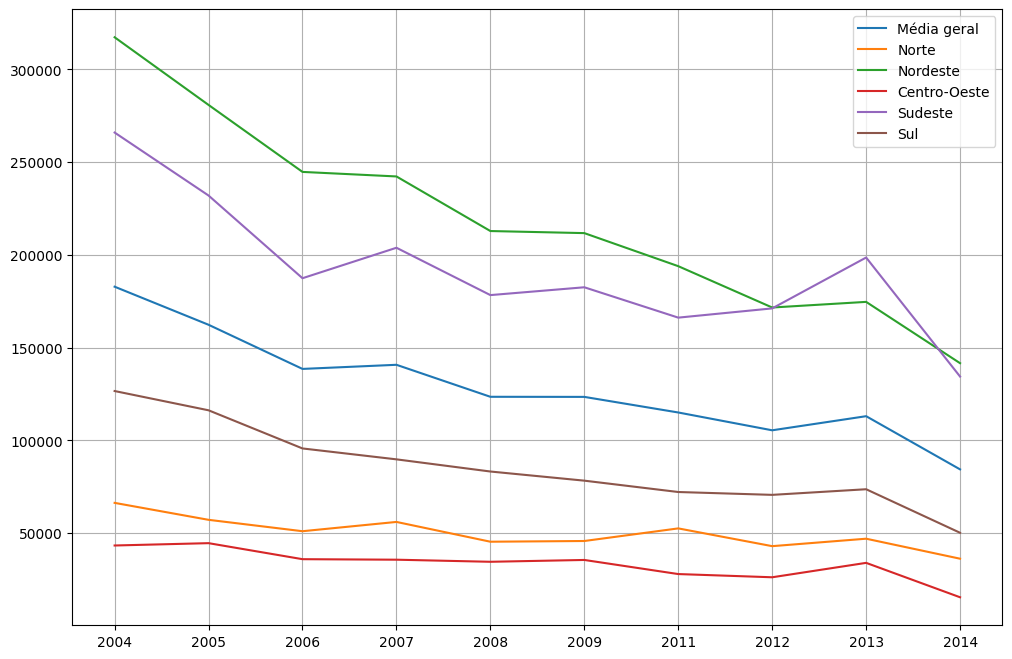

In [ ]:
plt.plot(mean_anos.index, mean_anos, label='Média geral')
for regioes in mean_regioes.index:
    plt.plot(mean_regioes.columns, mean_regioes.loc[regioes], label=regioes)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
above_mean = mean_regioes >= mean_anos
regioes_above_mean = above_mean.all(axis=1)
regioes_most_above_mean = regioes_above_mean.index[regioes_above_mean].tolist()

if len(regioes_most_above_mean) == 1:
    message = f'A região que sempre esteve acima da média geral é {regioes_most_above_mean[0]}.'
else:
    message = f'As regiões que sempre estiveram acima da média geral são: {", ".join(regioes_most_above_mean[:-1])} e {regioes_most_above_mean[-1]}.'

print(message)

As regiões que sempre estiveram acima da média geral são: Nordeste e Sudeste.


#####Essas duas regiões são as mais populosas do país, segundo o IBGE.

## Estados brasileiros que sempre estiveram acima da média em quantidade de domicílios em extrema pobreza

In [ ]:
mean_anos = df.mean()[4:]

In [ ]:
mean_estados = df.groupby('Sigla').mean().iloc[:, 3:]

In [ ]:
if not mean_anos.index.equals(mean_estados.columns):
    mean_anos, mean_estados = mean_anos.align(mean_estados, join='inner', axis=0)

In [ ]:
above_mean = mean_estados >= mean_anos
estados_above_mean = above_mean.all(axis=1)
estados_most_above_mean = estados_above_mean.index[estados_above_mean].tolist()


if len(estados_most_above_mean) == 1:
    message = f'O estado que sempre esteve acima da média geral é {estados_most_above_mean[0]}.'
elif len(estados_most_above_mean) == 0:
    message = f'Nenhum estado esteve acima da média geral em todos os anos.'
else:
    message = f'Os estados que sempre estiveram acima da média geral são: {", ".join(estados_most_above_mean[:-1])} e {estados_most_above_mean[-1]}.'

print(message)

Nenhum estado esteve acima da média geral em todos os anos.


#Considerações Finais

####Com esses dados, conseguimos analisar sobre os estados e regiões que mais possuem domicílios extremamente pobres. Percebemos que os números são alarmantes e diretamente proporcionais a quantidade de habitantes por estado. 

<div style="font-size: 20px;">

-   O estado com o maior número de domicílios em extrema pobreza no intervalo de tempo analisado é a Bahia, atingindo seu pico máximo em 2003, com 841.204 domicílios.

-   As regiões que mais se destacam em números, com a maior quantidade de domicílios em extrema pobreza é o Sudeste e o Nordeste, que, coincidentemente, são as duas regiões mais populosas do país.

-   O estado brasileiro que teve o menor número destes domicílios foi Roraima, com 4.373, e este quantitativo foi atingido em 2014.

-   A média geral por ano de domicílios em exterma pobreza mais alta no país  foi em 2004, com o total de 126.615 domicílios.
</div>

####Fica evidente a má distribuição de renda per capta no país, a falta de políticas públicas que direcionem e cumpram o mínimo para se viver com dignidade e a ignorância a um dos artigos da Declaração Universal dos Direitos Humanos, que afirma um "Padrão de vida que garanta saúde e bem-estar à família."